# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [5]:
print("Для воспроизводимости результатов")

Для воспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [68]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [7]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [9]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [10]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [13]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [14]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


>__Ответ:__ Пропуски есть в колонках: mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [48]:
len(df_train[df_train.drop('selling_price', axis=1).duplicated(keep=False)].sort_values(by=['name','year','km_driven']))

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [49]:
df_train[df_train.drop('selling_price', axis=1).duplicated(keep=False)].sort_values(by=['name','year','km_driven'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [69]:
df_train=df_train[~df_train.drop('selling_price', axis=1).duplicated(keep='first')]

In [70]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [71]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [566]:
pd.options.display.float_format = "{:.2f}".format

In [72]:
import re


def prepare_col(x):
    if type(x)!=float and any(map(str.isdigit, x)):
        s=x.split()[0]
    elif type(x)==float:
        s=x
    else:
        s=np.nan # вставляем np.nan в случае отсутствия цифр в столбце, например, когда указаны только единицы измерения
    return s

def prepare_torque(x):
    if type(x)!=float:
        try:
            s1=x.replace('at', '@').split('@')[0]
            s2=x.replace('at', '@').split('@')[1]
        except:
            s1=x.replace('at', '@').split('@')[0]
            s2=x.replace('at', '@').split('@')[0]
        if any(map(str.isalpha, s1))==False: #Если не указаны единицы измерения сразу за первым числом
            try:
                s1=s1+s2.split('(')[1] #Добавим единицы измерения из правой части строки в позицию за первым числом
            except:
                pass
    else:
        s1=x
        s2=x
    return s1

def torque_convert(x):
    if type(x)!=float and len(re.findall('[(/]', x))==0:
        s=re.sub('[^a-zA-Z]', '', x)
        if s.upper()=='KGM':
            x_new=float(re.sub('[a-zA-Z]', '', x))*9.80665
        else:
            x_new=float(re.sub('[a-zA-Z]', '', x))
    elif type(x)==float:
        x_new=x
    else:
        x_new=np.nan
    return x_new

def prepare_max_torque_rpm(x):
    if type(x)!=float and len(re.findall('[+]', x))==0:
        try:
            s2=x.replace('at', '@').split('@')[1]
            try:
                s2=s2.split('-')[1]
            except:
                try:
                    s2=s2.split('~')[1]
                except:
                    s2=s2
        except:
            s2=np.nan
    elif type(x)==float:
        s2=x
    else:
        s2=np.nan
    return s2

def convert_max_torque_rpm(x):
    if type(x)!=float:
        x_new=re.sub('[^0-9]', '', x)
    else:
        x_new=x
    return x_new

In [73]:
for c in ['mileage', 'engine', 'max_power']:
    df_train[c]=df_train[c].apply(prepare_col).astype('float')

df_train['max_torque_rpm']=df_train['torque'].apply(prepare_max_torque_rpm).apply(convert_max_torque_rpm).astype('float')
df_train['torque']=df_train['torque'].apply(prepare_torque).apply(torque_convert).astype('float')

In [74]:
for c in ['mileage', 'engine', 'max_power']:
    df_test[c]=df_test[c].apply(prepare_col).astype('float')


df_test['max_torque_rpm']=df_test['torque'].apply(prepare_max_torque_rpm).apply(convert_max_torque_rpm).astype('float')
df_test['torque']=df_test['torque'].apply(prepare_torque).apply(torque_convert).astype('float')

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [75]:
from sklearn import impute

In [76]:
cat_features_mask = (df_train.dtypes == "object").values

In [214]:
df_train_real=df_train[df_train.columns[~cat_features_mask]]
df_test_real=df_test[df_test.columns[~cat_features_mask]]

mis_replacer = impute.SimpleImputer(strategy="median")
df_train_r_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(df_train_real), columns=df_train_real.columns)
df_test_r_no_mis = pd.DataFrame(data=mis_replacer.transform(df_test_real), columns=df_test_real.columns)

df_train_no_mis = pd.concat([df_train_r_no_mis, df_train[df_train.columns[cat_features_mask]]], axis=1)
df_test_no_mis = pd.concat([df_test_r_no_mis, df_test[df_test.columns[cat_features_mask]]], axis=1)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [215]:
df_train_no_mis[['engine', 'seats']]=df_train_no_mis[['engine', 'seats']].astype('int16')
df_test_no_mis[['engine', 'seats']]=df_test_no_mis[['engine', 'seats']].astype('int16')

In [538]:
print("""seats, возможно, лучше сделать категориальной переменной по 2-ум причинам:
1. 5 мест - по сути, стандарт большинства машин, который скорее хочется интерпретировать как "стандарт", а не как дискретное число мест
2. расстояния между значениями: 5, 6 и 7 местная машины - это скорее разные типы, про которые сложно сказать, 
что "7 местная лучше 6 местной на столько же, насколько и 6-местная лучше 5-местной"
""")

seats, возможно, лучше сделать категориальной переменной по 2-ум причинам:
1. 5 мест - по сути, стандарт большинства машин, который скорее хочется интерпретировать как "стандарт", а не как дискретное число мест
2. расстояния между значениями: 5, 6 и 7 местная машины - это скорее разные типы, про которые сложно сказать, 
что "7 местная лучше 6 местной на столько же, насколько и 6-местная лучше 5-местной"



## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

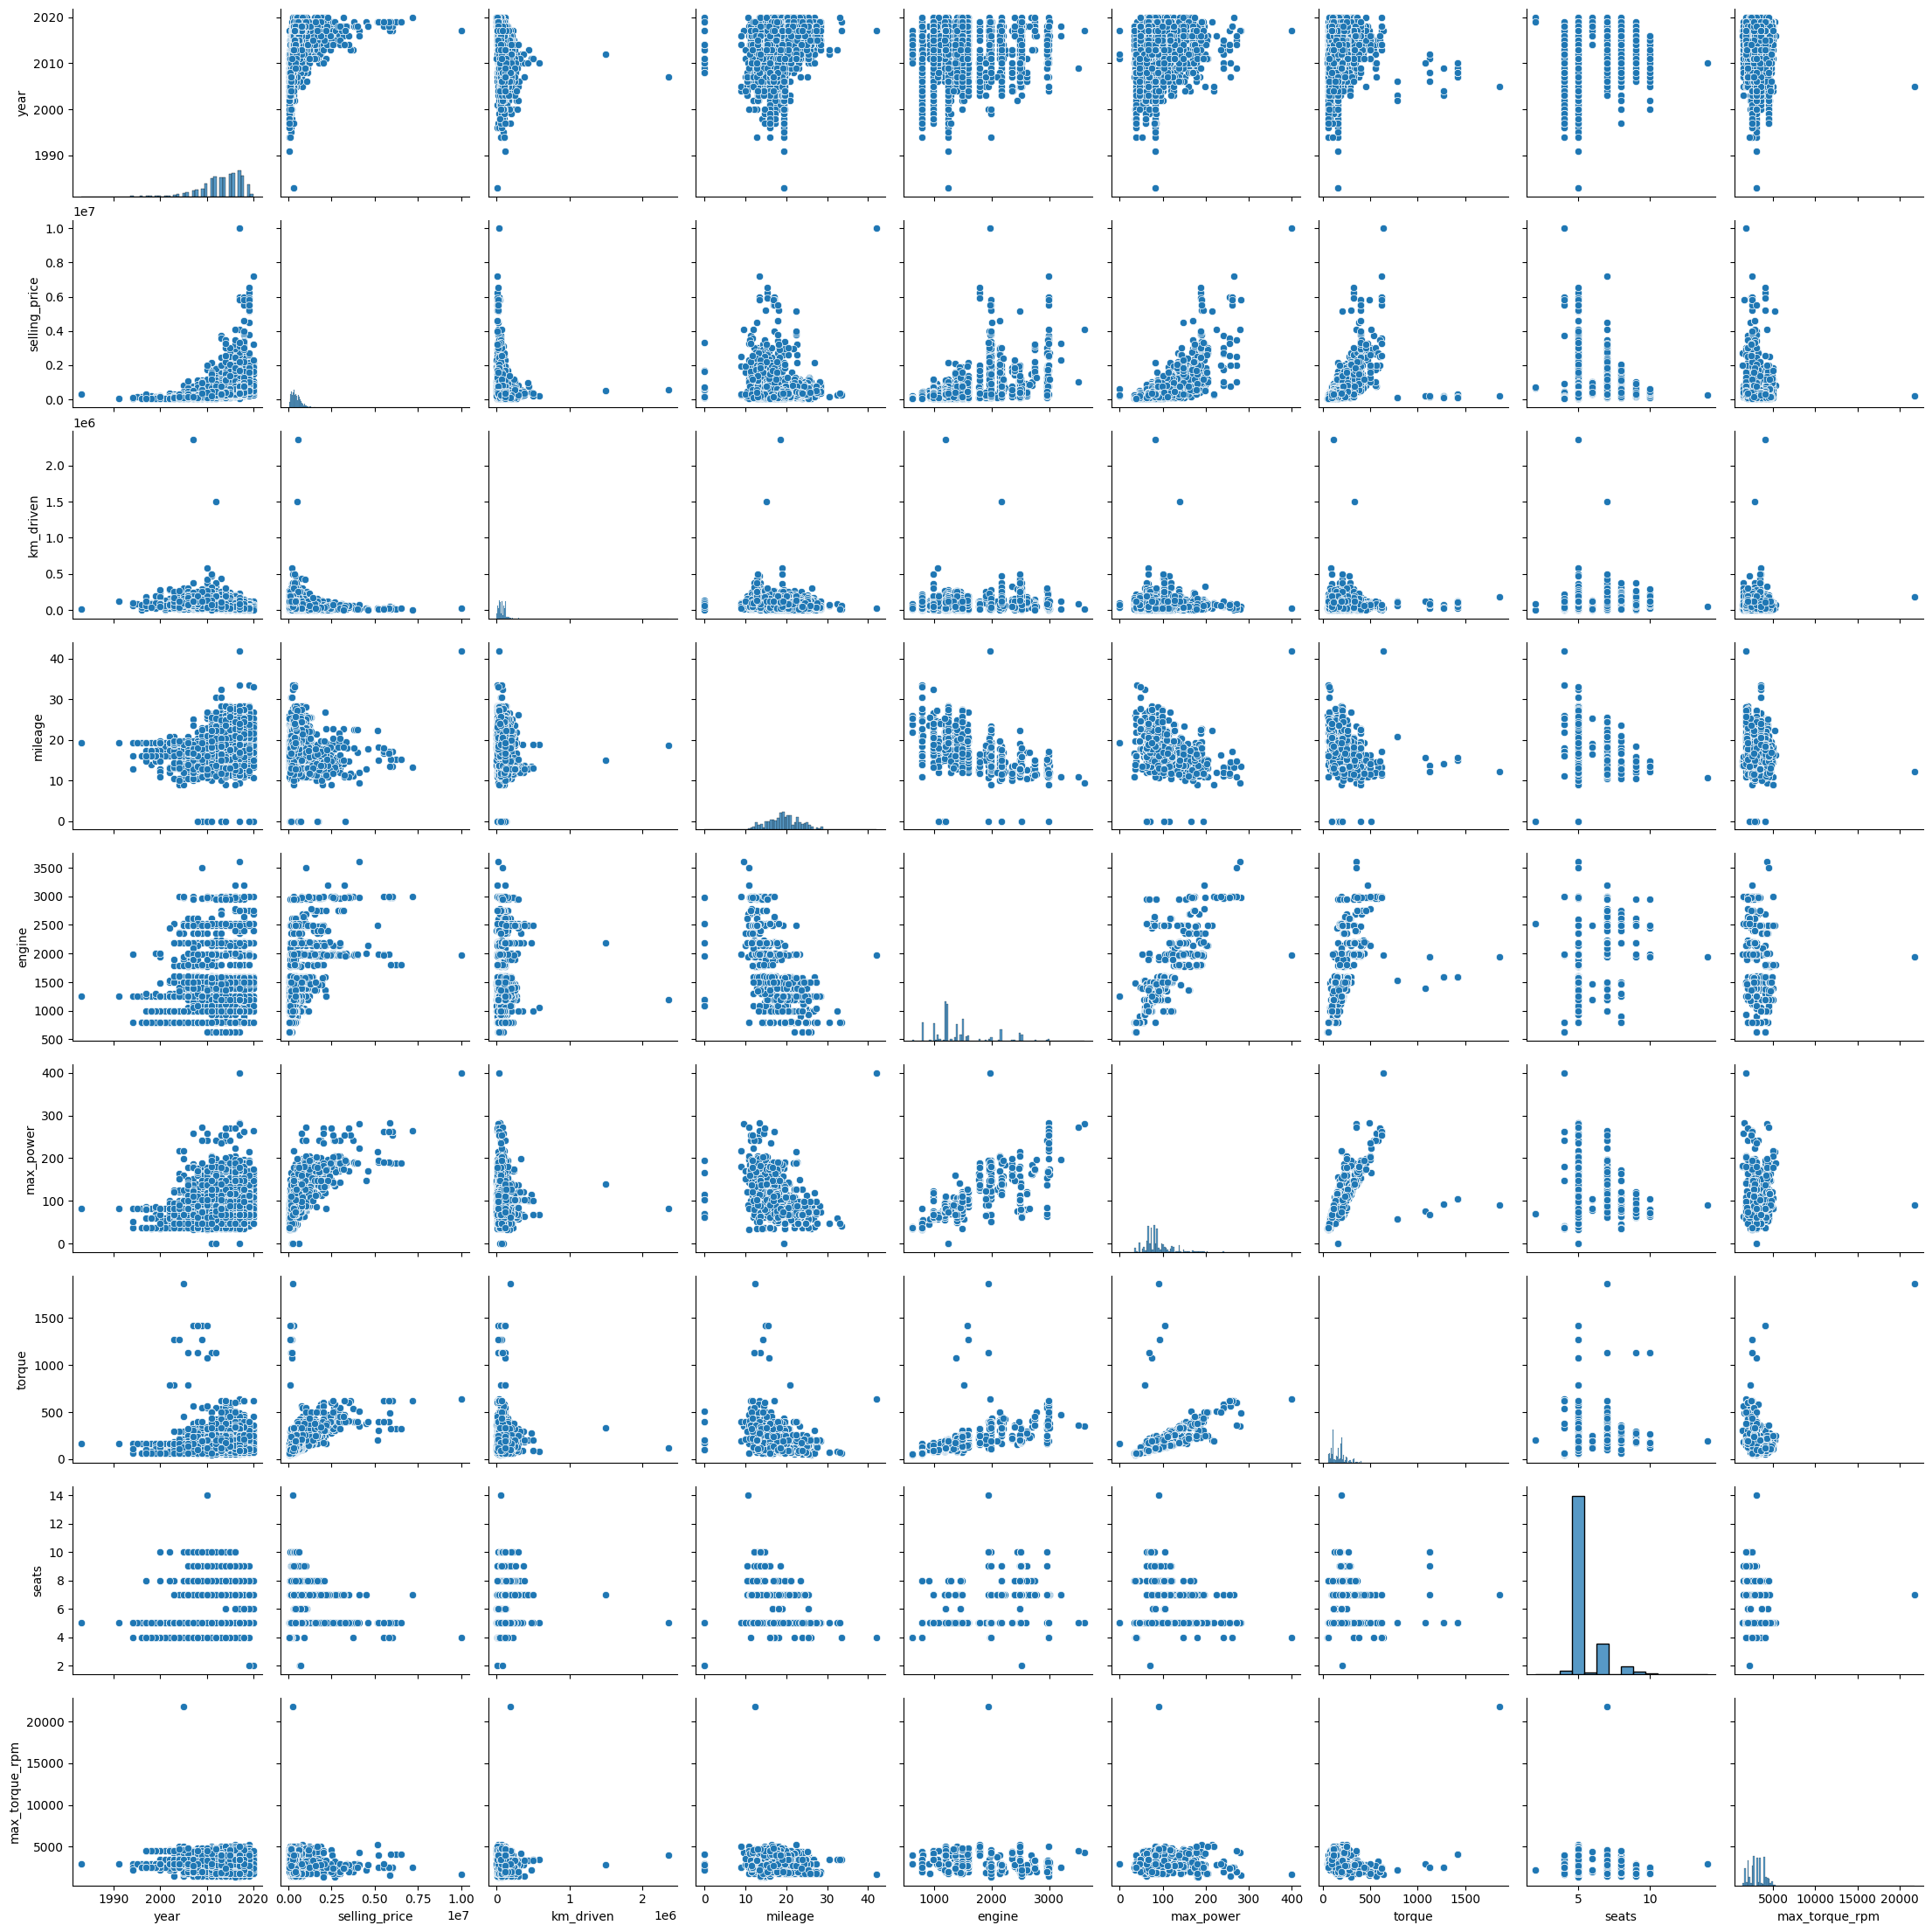

In [540]:
sns.pairplot(data=df_train_r_no_mis)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Для ряда признаков по графикам просматривается корреляция с целевой переменной:
Более свежий год выпуска, меньший пробег, больший объем двигателя, более высокие мощность и крутящий момент - ведут к росту цены на автомобиль. Все признаки согласуются с интуицией.

2. Часть признаков по графикам так же кажутся скореллироваными между собой, например:
mileage (видимо, степень экономичнсоти - колв-о км на 1 л топлива) и год выпуска - чем свежее авто, тем экономнее
mileage и признаки, отражающие мощность авто (объем двигателя, мощность, крутящий момент) - чем мощнее авто, тем хуже с экономичностью
мощность (maxpower) и год выпуска - положительно скореелированы
мощность и объем двигателя, крутящий момент

3. Кажется, что выводы были бы более наглядными, если убрать выбросы в ряде признаков

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

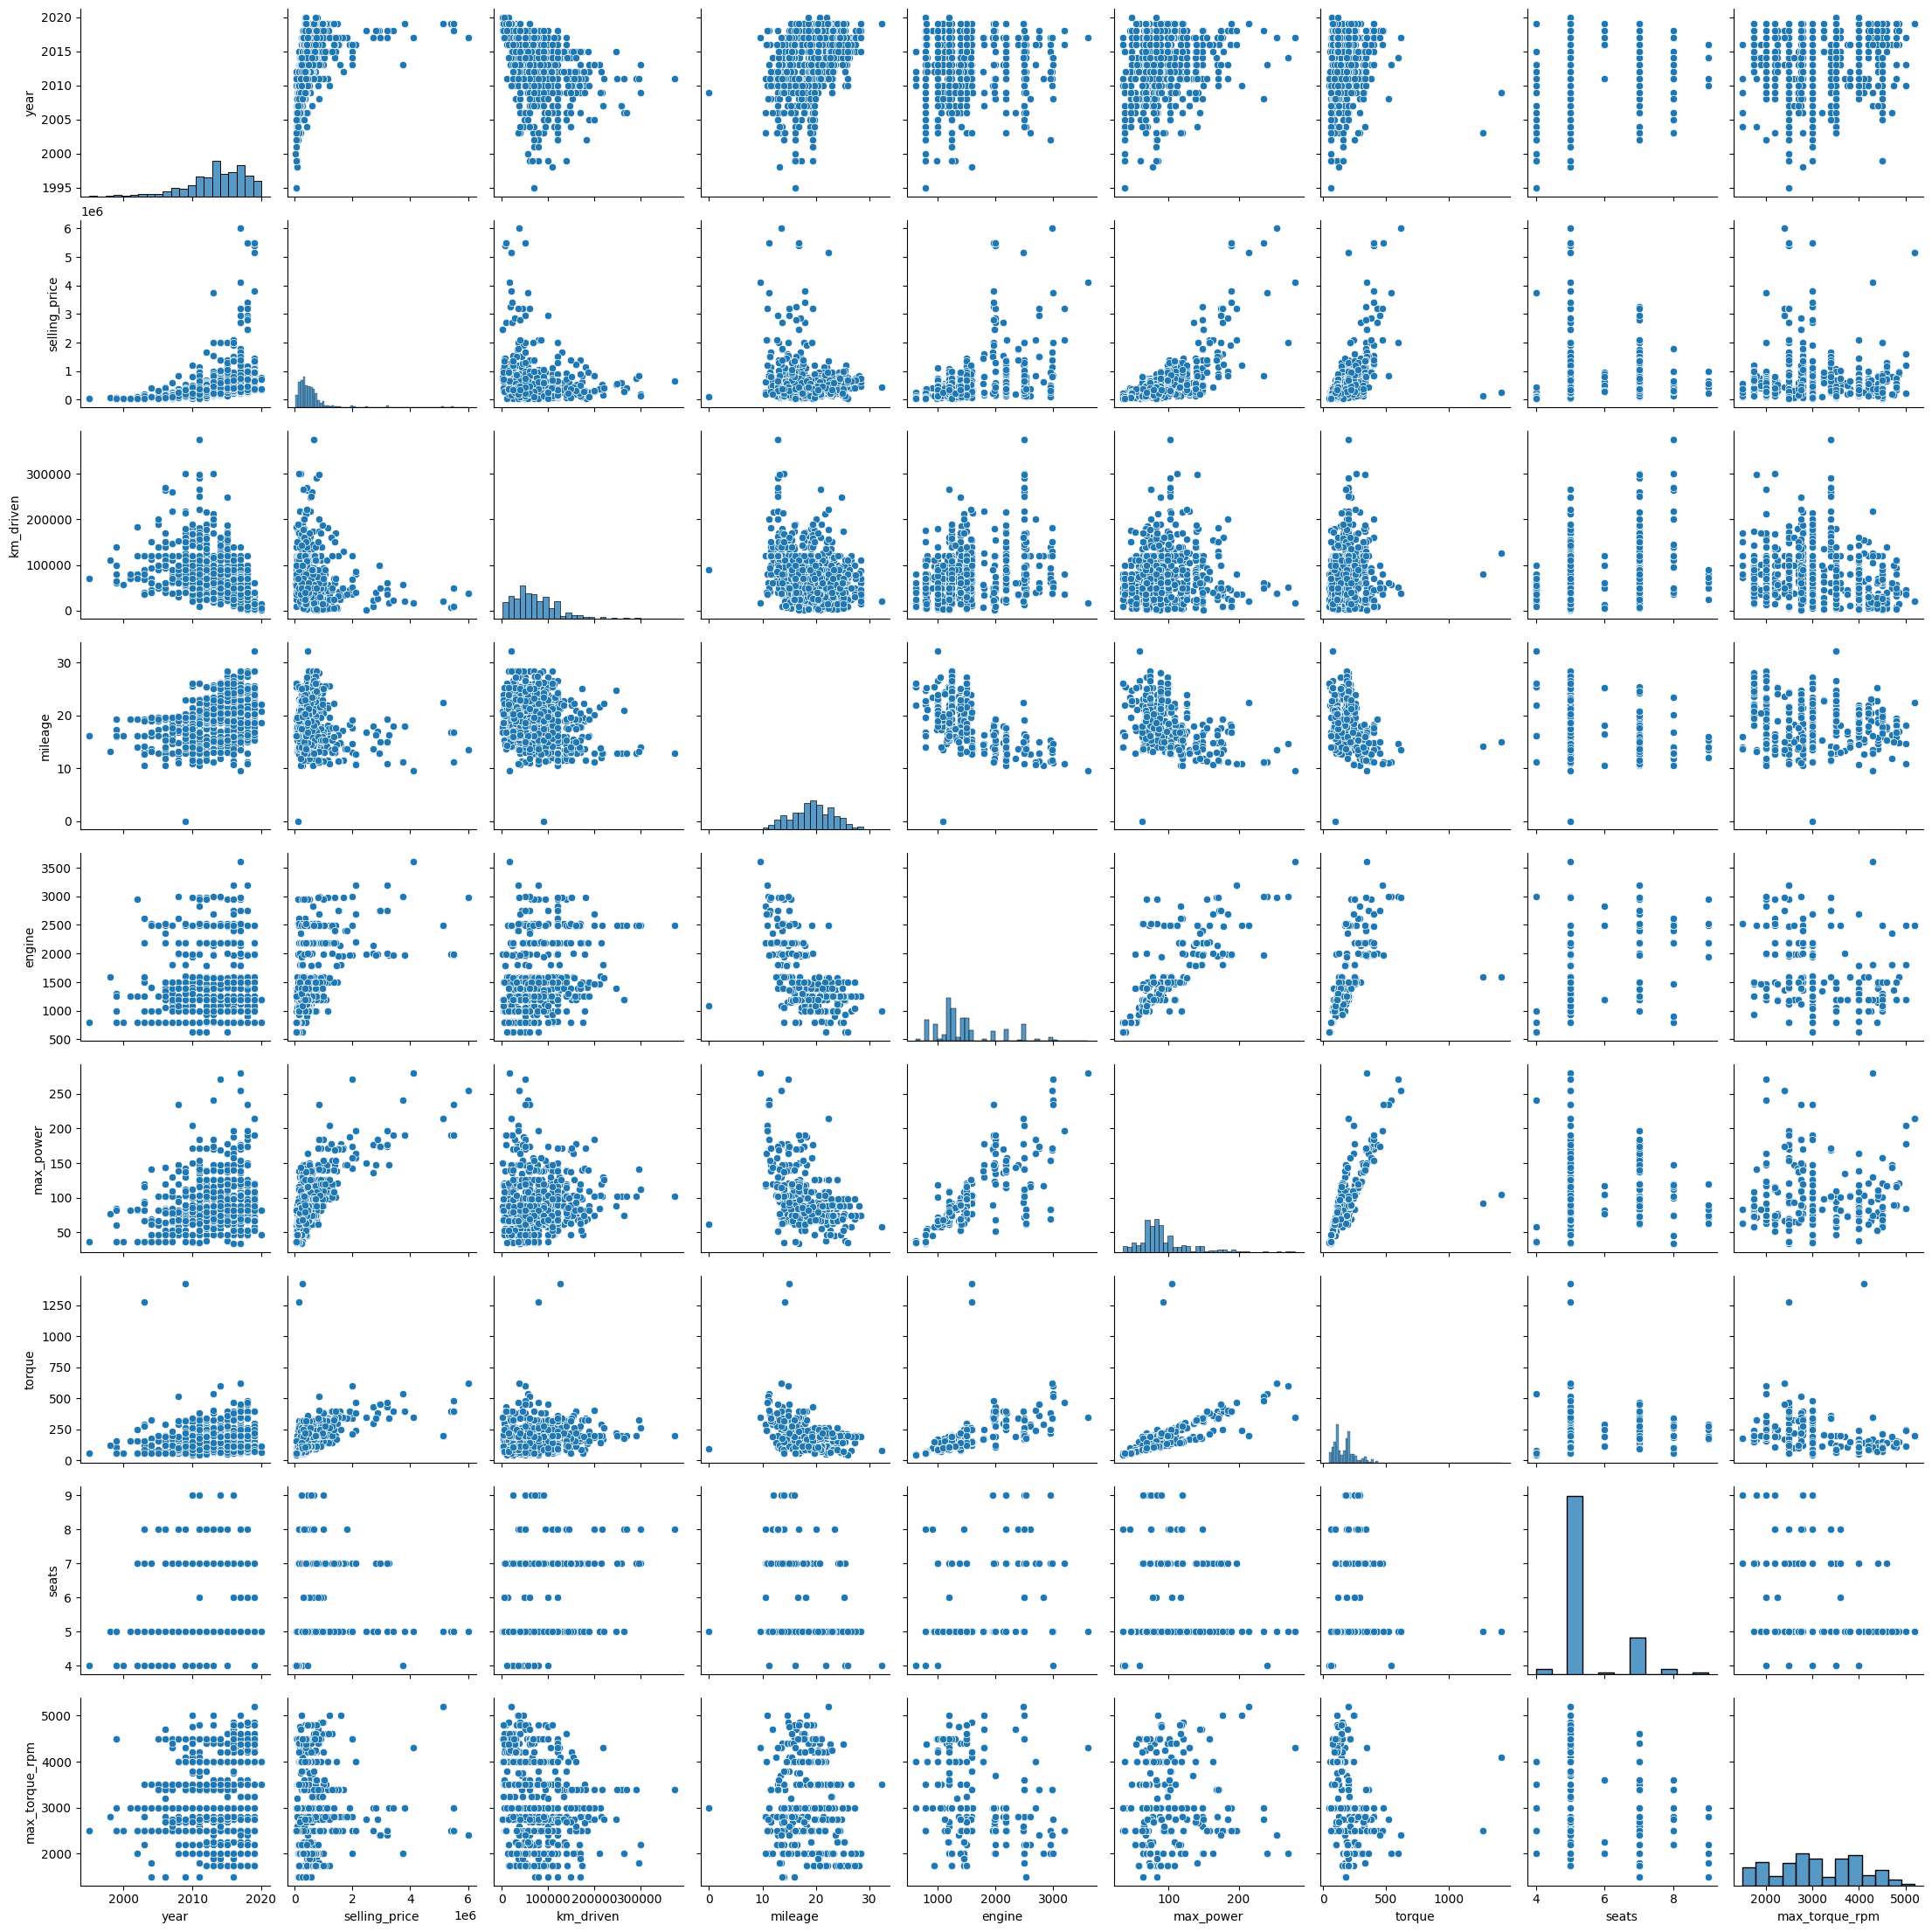

In [541]:
sns.pairplot(data=df_test_r_no_mis)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

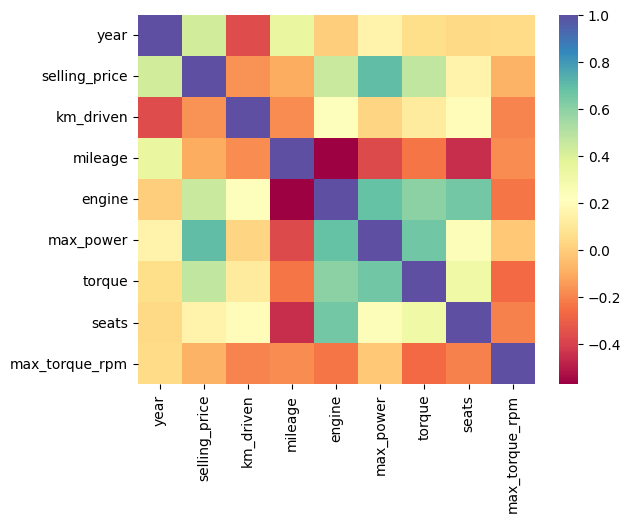

In [570]:
sns.heatmap(df_train_r_no_mis.corr(), cmap='Spectral')

In [581]:
X_train_corr=df_train_r_no_mis.drop('selling_price', axis=1).corr()

In [583]:
np.argmin(np.abs(X_train_corr))

3

In [578]:
X_train_corr

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.00,-0.37,0.34,0.00,0.16,0.05,0.04,0.05
km_driven,-0.37,1.00,-0.18,0.23,0.02,0.11,0.19,-0.20
mileage,0.34,-0.18,1.00,-0.57,-0.37,-0.24,-0.45,-0.19
engine,0.00,0.23,-0.57,1.00,0.68,0.60,0.65,-0.24
max_power,0.16,0.02,-0.37,0.68,1.00,0.66,0.24,-0.02
torque,0.05,0.11,-0.24,0.60,0.66,1.00,0.32,-0.27
seats,0.04,0.19,-0.45,0.65,0.24,0.32,1.00,-0.20
max_torque_rpm,0.05,-0.20,-0.19,-0.24,-0.02,-0.27,-0.20,1.00


In [577]:
X_train_corr[X_train_corr>=0.6]

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km_driven,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
mileage,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
engine,NaN,NaN,NaN,1.00,0.68,NaN,0.65,NaN
max_power,NaN,NaN,NaN,0.68,1.00,0.66,NaN,NaN
torque,NaN,NaN,NaN,NaN,0.66,1.00,NaN,NaN
seats,NaN,NaN,NaN,0.65,NaN,NaN,1.00,NaN
max_torque_rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Среди признаков наименее скореллированы год выпуска и объем двигателя (year и engine)
2. Сильная положительная линейная связь (возьмем признаки, между которыми коэфф. корреляции>0.6):
engine и max_power, engine и seats, max_power и torque
3. Да, правильно. Т.к. коэффициент корреляции между годом выпуска и пробегом составляет -0.37 (на хитмапе так же отчетливо видна красная "ячейка")

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='engine', ylabel='max_power'>

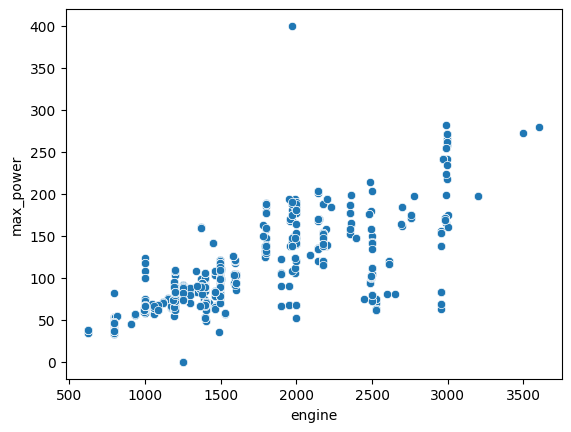

In [587]:
sns.scatterplot(data=df_train_r_no_mis, x='engine', y='max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [588]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190.00,5.00,2000.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250.00,5.00,2500.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,219.67,5.00,2750.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,112.78,5.00,4500.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,113.75,5.00,4000.00


In [216]:
df_train_no_mis.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,name,fuel,seller_type,transmission,owner
0,2014.0,450000.0,145500.0,23.40,1248,74.00,190.000000,5,2000.0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,2014.0,370000.0,120000.0,21.14,1498,103.52,250.000000,5,2500.0,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,2010.0,225000.0,127000.0,23.00,1396,90.00,219.668960,5,2750.0,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
3,2007.0,130000.0,120000.0,16.10,1298,88.20,112.776475,5,4500.0,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
4,2017.0,440000.0,45000.0,20.14,1197,81.86,113.750000,5,4000.0,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner


In [217]:
cat_features_mask_new=(df_train_no_mis.dtypes=='object').values

In [80]:
y_train = df_train_no_mis['selling_price']
X_train = df_train_no_mis[df_train_no_mis.columns[~cat_features_mask_new]].drop('selling_price', axis=1)

In [618]:
X_train.columns

Index(['km_driven', 'mileage', 'max_torque_rpm', 'name', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [81]:
assert X_train.shape == (5840, 6) # Ожидаемо, т.к. в моем датасете есть еще torque и max_torque_rpm

AssertionError: 

In [82]:
y_test = df_test_no_mis['selling_price']
X_test = df_test_no_mis[df_test_no_mis.columns[~cat_features_mask_new]].drop('selling_price', axis=1)

In [601]:
assert X_test.shape == (1000, 6) # Ожидаемо, т.к. в моем датасете есть еще torque и max_torque_rpm

AssertionError: 

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [83]:
df_train_no_mis.columns[cat_features_mask_new]

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr=LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr=lr.predict(X_test)

print(f"""На трейне: R2:{r2_score(y_train, lr.predict(X_train))}, MSE:{MSE(y_train, lr.predict(X_train))},
\nНа тесте: R2:{r2_score(y_test, y_pred_lr)}, MSE:{MSE(y_test, y_pred_lr)}""")

На трейне: R2:0.601039070609054, MSE:114357497870.33887,

На тесте: R2:0.6004819368463257, MSE:229654391194.09543


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [85]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

lr2=LinearRegression()

lr2.fit(X_train_scaled, y_train)

y_pred_lr2=lr2.predict(X_test_scaled)

print(f"""На трейне: R2:{r2_score(y_train, lr2.predict(X_train_scaled))}, MSE:{MSE(y_train, lr2.predict(X_train_scaled))},
\nНа тесте: R2:{r2_score(y_test, y_pred_lr2)}, MSE:{MSE(y_test, y_pred_lr2)}""")

На трейне: R2:0.601039070609054, MSE:114357497870.33885,

На тесте: R2:0.6004819368463281, MSE:229654391194.09402


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [86]:
print(f"""Наиболее информативен в предсказании цены признак с наибольшим абсолютным значением коэффициента: 
{X_train_scaled.columns[np.argmax(np.abs(lr2.coef_))]}""")

Наиболее информативен в предсказании цены признак с наибольшим абсолютным значением коэффициента: 
max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [87]:
from sklearn.linear_model import Lasso

ls=Lasso()

ls.fit(X_train_scaled, y_train)

y_pred_ls=ls.predict(X_test_scaled)

print(f"""На трейне: R2:{r2_score(y_train, ls.predict(X_train_scaled))}, MSE:{MSE(y_train, ls.predict(X_train_scaled))},
\nНа тесте: R2:{r2_score(y_test, y_pred_ls)}, MSE:{MSE(y_test, y_pred_ls)}""")

На трейне: R2:0.6010390705615216, MSE:114357497883.96347,

На тесте: R2:0.6004806526928237, MSE:229655129362.19818


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [88]:
ls.coef_

array([165561.62586241, -48849.55494763,  -8435.52872648,  23014.74909178,
       328899.8854599 ,   7313.86454665, -30574.72731335, -58659.91544655])

Lasso не занулила коэффициенты. Возможно, из-за недостаточно высокой чувствительности к регуляризации (низкий коэф. перед модулями весов)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [89]:
from sklearn.model_selection import GridSearchCV

ls2=Lasso()

param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100, 500, 1000, 10000, 15000, 20000, 21000, 21500, 21600, 22000, 23000, 24000, 25000]}

grid_searcher=GridSearchCV(ls2, param_grid=param_grid, cv=10, n_jobs=-1)

grid_searcher.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100, 500, 1000, 10000,
                                   15000, 20000, 21000, 21500, 21600, 22000,
                                   23000, 24000, 25000]})

In [90]:
grid_searcher.best_score_

0.583191690615191

In [92]:
d=dict(zip(X_train_scaled.columns, grid_searcher.best_estimator_.coef_))
d

{'year': 147710.77984873377,
 'km_driven': -26639.051980658176,
 'mileage': 0.0,
 'engine': 0.0,
 'max_power': 326334.77704323316,
 'torque': 0.0,
 'seats': -0.0,
 'max_torque_rpm': -31551.692905907097}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [93]:
print(f"Грид-серч обучал {len(param_grid['alpha'])*10}. Для каждого параметра в сетке по 10 фолдам")
print(f"Коэффициент регуляризации у лучшей модели={grid_searcher.best_params_['alpha']}")
print(f"Да, занулились веса при признаках{[k for k in d if d[k]==0]}")

Грид-серч обучал 190. Для каждого параметра в сетке по 10 фолдам
Коэффициент регуляризации у лучшей модели=21500
Да, занулились веса при признаках['mileage', 'engine', 'torque', 'seats']


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [94]:
from sklearn.linear_model import ElasticNet

eln=ElasticNet()

param_grid2={'alpha': [1, 50, 100, 1000, 10000, 20000, 21000, 21500, 21699, 22000, 25000], 'l1_ratio':[x/10 for x in range(1, 11)]}

grid_searcher2=GridSearchCV(eln, param_grid=param_grid2, cv=10, n_jobs=-1)

grid_searcher2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 50, 100, 1000, 10000, 20000, 21000, 21500,
                                   21699, 22000, 25000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0]})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [95]:
grid_searcher2.best_score_

0.583191690615191

In [96]:
print(f"гиперпараметры, соответствующие лучшей из перебранных моделей: {grid_searcher2.best_params_}")

гиперпараметры, соответствующие лучшей из перебранных моделей: {'alpha': 21500, 'l1_ratio': 1.0}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [97]:
X_train_cat = df_train_no_mis.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test_no_mis.drop(['selling_price', 'name'], axis=1)

In [98]:
assert X_train_cat.shape == (5840, 10) # Два лишних столбца: torque, max_torque_rpm

AssertionError: 

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [394]:
X_train_cat['seats']=X_train_cat['seats'].astype('object')
X_test_cat['seats']=X_test_cat['seats'].astype('object')

cat_features_mask2=(X_train_cat.dtypes=='object').values

scaler3=StandardScaler()

X_train_cat[X_train_cat.columns[~cat_features_mask2]]=pd.DataFrame(
    scaler3.fit_transform(X_train_cat[X_train_cat.columns[~cat_features_mask2]]), 
    columns=X_train_cat.columns[~cat_features_mask2]
)

X_test_cat[X_test_cat.columns[~cat_features_mask2]]=pd.DataFrame(
    scaler3.fit_transform(X_test_cat[X_test_cat.columns[~cat_features_mask2]]), 
    columns=X_test_cat.columns[~cat_features_mask2]
)

In [395]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')

X_train_cat_encoded=pd.DataFrame(ohe.fit_transform(X_train_cat[X_train_cat.columns[cat_features_mask2]]).toarray(),
             columns=ohe.get_feature_names_out())

X_test_cat_encoded=pd.DataFrame(ohe.transform(X_test_cat[X_test_cat.columns[cat_features_mask2]]).toarray(), 
             columns=ohe.get_feature_names_out())

X_train_cat_full=pd.concat([X_train_cat[X_train_cat.columns[~cat_features_mask2]], X_train_cat_encoded], axis=1)
X_test_cat_full=pd.concat([X_test_cat[X_test_cat.columns[~cat_features_mask2]], X_test_cat_encoded], axis=1)

In [101]:
print(f'''OHE в отличие от pd.get_dummies позволяет\
трансоформировать тест по категориям трейна,
совпадают ли столбцы закодированных трейна и теста: {np.all(X_train_cat_encoded.columns==X_test_cat_encoded.columns)}''')

OHE в отличие от pd.get_dummies позволяеттрансоформировать тест по категориям трейна,
совпадают ли столбцы закодированных трейна и теста: True


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [396]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid3={'alpha': [1, 5, 7.5, 7.75, 8, 8.5, 10, 15, 20, 50, 100, 150, 500, 1000]}

grid_searcher3=GridSearchCV(Ridge(), scoring='r2', param_grid=param_grid3, cv=10, n_jobs=-1)

grid_searcher3.fit(X_train_cat_full, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 5, 7.5, 7.75, 8, 8.5, 10, 15, 20, 50, 100,
                                   150, 500, 1000]},
             scoring='r2')

In [397]:
grid_searcher3.best_params_

{'alpha': 7.75}

In [104]:
print(f"Да, качество предсказаний улучшилось, теперь R2 по кросс-валидации составляет: {grid_searcher3.best_score_}")

Да, качество предсказаний улучшилось, теперь R2 по кросс-валидации составляет: 0.6273545599433707


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [284]:
X_train_fe = df_train_no_mis.drop('selling_price', axis=1)
X_test_fe = df_test_no_mis.drop('selling_price', axis=1)

## 1. Сгенерировать новые признаки на основе уже существующих

In [285]:
#1
from datetime import date
date.today().year

X_train_fe['hp_per_1l_engine']=X_train_fe.max_power/X_train_fe.engine

X_train_fe['age']=date.today().year-X_train_fe.year #возраст авто
X_train_fe['age_squared']=X_train_fe['age']**2

#средний пробег в год - оценка того, насколько интенсивно эксплуатировался автомобиль
X_train_fe['km_driven_per_year']=(X_train_fe.km_driven/X_train_fe['age']).astype('int32')

#sns.pairplot(data=pd.concat([y_train, X_train_fe[['hp_per_1l_engine', 'age','km_driven_per_year']]], axis=1))

In [286]:
X_test_fe['hp_per_1l_engine']=X_test_fe.max_power/X_train_fe.engine

X_test_fe['age']=date.today().year-X_test_fe.year #возраст авто
X_test_fe['age_squared']=X_test_fe['age']**2

#средний пробег в год - оценка того, насколько интенсивно эксплуатировался автомобиль
X_test_fe['km_driven_per_year']=(X_test_fe.km_driven/X_test_fe['age']).astype('int32')

#sns.pairplot(data=pd.concat([y_test, X_test_fe[['hp_per_1l_engine', 'age','km_driven_per_year']]], axis=1))

## 2. Добыть новые признаки

In [288]:
#2
X_train_fe['brand']=X_train_fe.name.apply(lambda x: x.split()[0])
X_test_fe['brand']=X_test_fe.name.apply(lambda x: x.split()[0])

X_train_fe['1_or_2_ownrs_Dealer']=np.where(X_train_fe.owner.isin(['First Owner', 'Second Owner'])&(X_train_fe.seller_type=='Dealer'), 1, 0)

X_test_fe['1_or_2_ownrs_Dealer']=np.where(X_test_fe.owner.isin(['First Owner', 'Second Owner'])&(X_test_fe.seller_type=='Dealer'), 1, 0)

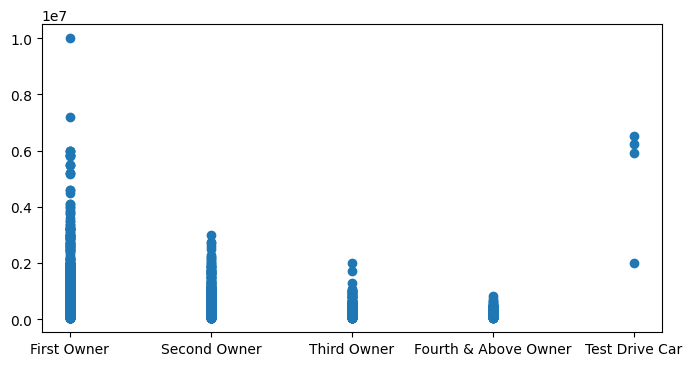

In [241]:
plt.figure(figsize=(8, 4))
plt.scatter(data=pd.concat([y_train, X_train_fe], axis=1), x='owner', y='selling_price')

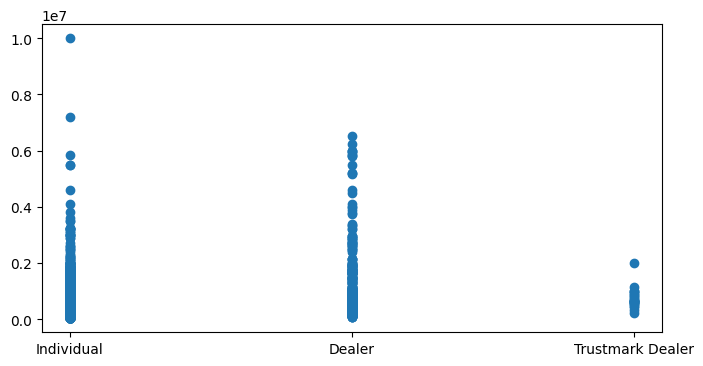

In [243]:
plt.figure(figsize=(8, 4))
plt.scatter(data=pd.concat([y_train, X_train_fe], axis=1), x='seller_type', y='selling_price')

In [289]:
cat_features_mask_fe=(X_train_fe.dtypes=='object').values

In [292]:
scaler4=StandardScaler()

In [677]:
X_train_fe_real.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm', 'hp_per_1l_engine', 'age', 'age_squared',
       'km_driven_per_year'],
      dtype='object')

In [302]:
X_train_fe_real=X_train_fe[X_train_fe.columns[~cat_features_mask_fe]].drop('1_or_2_ownrs_Dealer', axis=1)
X_test_fe_real=X_test_fe[X_test_fe.columns[~cat_features_mask_fe]].drop('1_or_2_ownrs_Dealer', axis=1)

In [303]:
X_train_fe_real_scaled=pd.DataFrame(scaler4.fit_transform(X_train_fe_real), columns=X_train_fe_real.columns)
X_test_fe_real_scaled=pd.DataFrame(scaler4.transform(X_test_fe_real), columns=X_test_fe_real.columns)

In [316]:
X_train_fe_cat=X_train_fe[X_train_fe.columns[cat_features_mask_fe]].drop('name', axis=1)
X_test_fe_cat=X_test_fe[X_test_fe.columns[cat_features_mask_fe]].drop('name', axis=1)

In [326]:
ohe2=OneHotEncoder(drop='first', handle_unknown='ignore')

X_train_fe_cat_enc=pd.DataFrame(ohe2.fit_transform(X_train_fe_cat).toarray(),
             columns=ohe2.get_feature_names_out())

X_test_fe_cat_enc=pd.DataFrame(ohe2.transform(X_test_fe_cat).toarray(),
             columns=ohe2.get_feature_names_out())

/Users/vladimirmirosnikov/miniconda3/envs/mlops_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [402]:
X_train_fe_full=pd.concat([X_train_fe_real_scaled, X_train_fe_cat_enc, X_train_fe['1_or_2_ownrs_Dealer']], axis=1)
X_test_fe_full=pd.concat([X_test_fe_real_scaled, X_test_fe_cat_enc, X_test_fe['1_or_2_ownrs_Dealer']], axis=1)

In [336]:
X_train_fe_full.head()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,hp_per_1l_engine,age,...,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,1_or_2_ownrs_Dealer
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.138069,-0.434419,-1.150140,-0.273186,-0.139570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.698518,-0.434419,-0.600222,0.524628,-0.139570,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.415201,-0.434419,-0.325263,0.147657,0.837167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.583262,-0.434419,1.599450,0.430719,1.569719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.574168,-0.434419,1.049532,0.466252,-0.872122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [339]:
num_features=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 
               'max_torque_rpm', 'hp_per_1l_engine', 'age', 'age_squared',
       'km_driven_per_year']

## 3. Поработать с уже имеющимися

### 3.1. Обрезка выбросов (смотрим boxplot'ы "до", обрезаем выбросы (нижние и верхние по 1%), смотрим boxplot'ы "после")

<Axes: >

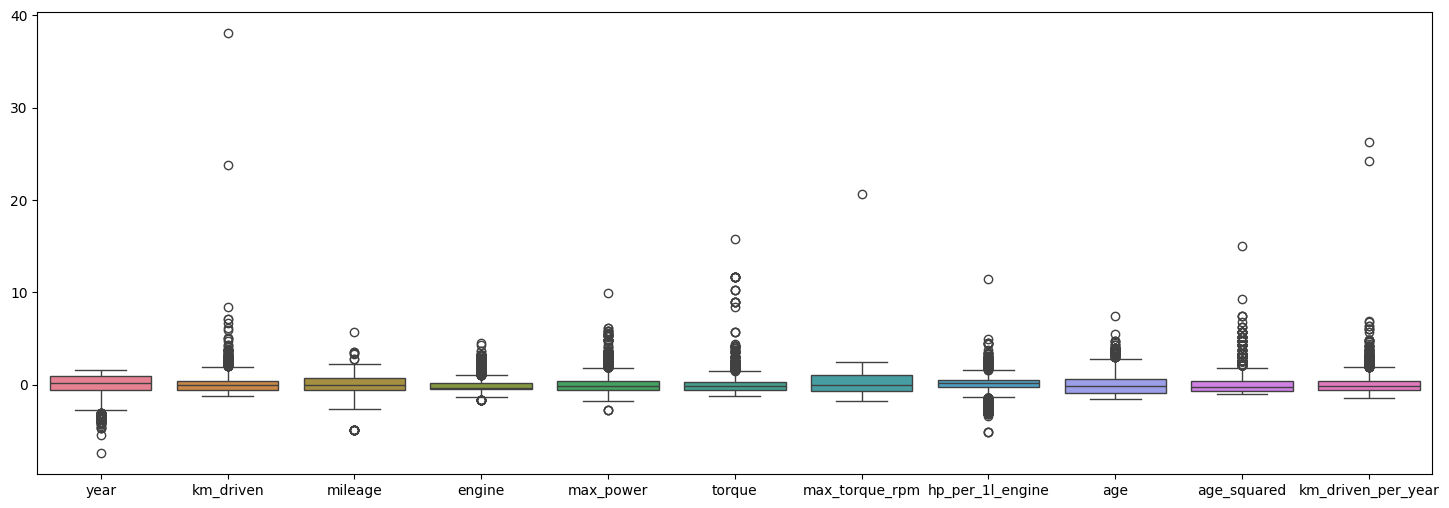

In [403]:
plt.figure(figsize=(18,6))
sns.boxplot(X_train_fe_full[num_features])

In [405]:
#Уберем выбросы выше 99-ой персентили (т.к. MSE крайне чувствительна к выбросам)
for col in num_features:
    X_train_fe_full[col]=np.where(X_train_fe_full[col]>X_train_fe_full[col].quantile(0.99),
                                  X_train_fe_full[col].quantile(0.99),
                                  X_train_fe_full[col])

In [406]:
#Уберем выбросы ниже 1-ой персентили (т.к. MSE крайне чувствительна к выбросам)
for col in num_features:
    X_train_fe_full[col]=np.where(X_train_fe_full[col]<X_train_fe_full[col].quantile(0.01),
                                  X_train_fe_full[col].quantile(0.01),
                                  X_train_fe_full[col])

<Axes: >

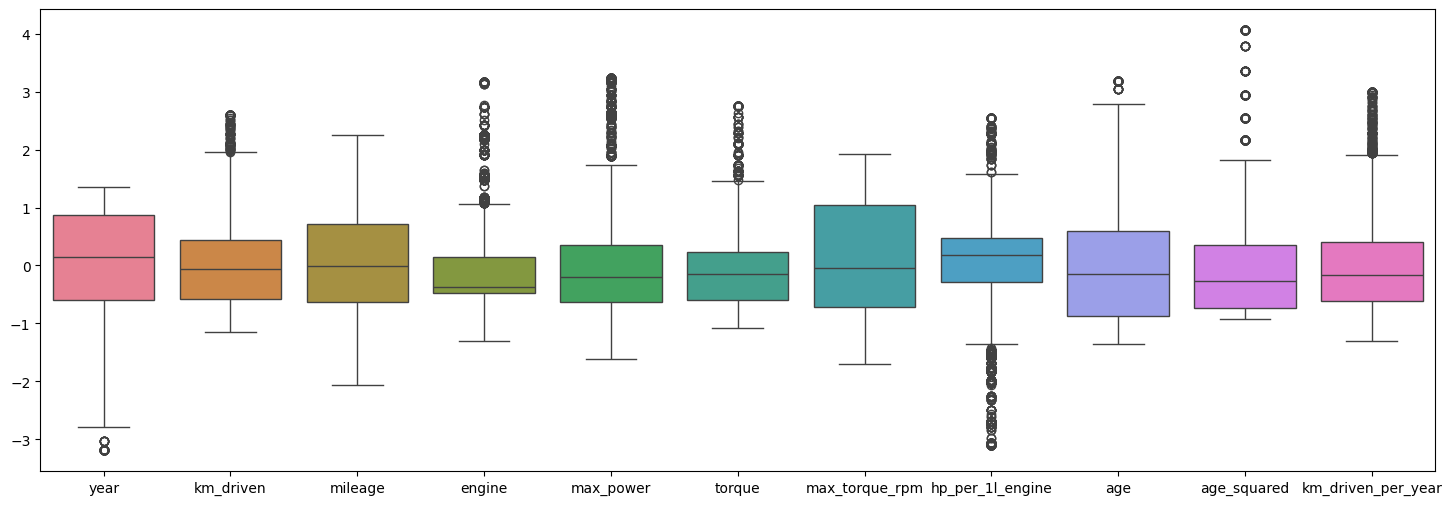

In [408]:
#Посмотрим на boxplot'ы после обрезки выбросов
plt.figure(figsize=(18,6))
sns.boxplot(X_train_fe_full[num_features])

### 3.2. Обучим линейную регрессию на модель с доп. признаками и без выбросов (+ сравним эту модель с предыдущей лучшей, в том числе по adj_R2, т.к. выросло кол-во признаков)

In [356]:
lr_fe=LinearRegression()

lr_fe.fit(X_train_fe_full, y_train)

In [ ]:
def adj_r2_score(X_df: pd.DataFrame, r2: float):
    n=len(X_df)
    p=len(X_df.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [412]:
r2_fe=r2_score(y_test, lr_fe.predict(X_test_fe_full))
adj_r2_fe=adj_r2_score(X_test_fe_full, r2=r2_score(y_test, lr_fe.predict(X_test_fe_full)))

In [418]:
r2_gs3=r2_score(y_test, grid_searcher3.predict(X_test_cat_full))
adj_r2_gs3=adj_r2_score(X_test_cat_full, r2=r2_score(y_test, grid_searcher3.predict(X_test_cat_full)))

In [425]:
print(f" R2: {round(r2_fe, 3)} и adj_R2: {round(adj_r2_fe, 3)} новой модели\n\n", 
      f"R2: {round(r2_gs3, 3)} и adj_R2: {round(adj_r2_gs3, 3)} предыдущей лучшей модели")

 R2: 0.791 и adj_R2: 0.779 новой модели

 R2: 0.629 и adj_R2: 0.619 предыдущей лучшей модели


### 3.3. Попробуем пройтись циклом по n самых значимых признаков и построить график adj_r2 - сравнив т.о. модели с разным кол-во признаков

In [455]:
sorted_feature_dict=sorted(dict(zip(X_train_fe_full.columns, np.abs(lr_fe.coef_))).items(), key=lambda x: x[1], reverse=True)

In [450]:
sorted_feature_list=[x[0] for x in sorted_feature_dict]

In [458]:
r2_list=[]
adj_r2_list=[]

for i in range(1, len(sorted_feature_list)+1):
    lr_i=LinearRegression()
    lr_i.fit(X_train_fe_full[sorted_feature_list[:i]], y_train)
    y_pred_i=lr_i.predict(X_test_fe_full[sorted_feature_list[:i]])
    r2_i=r2_score(y_test, y_pred_i)
    adj_r2_i=adj_r2_score(X_test_fe_full[sorted_feature_list[:i]], r2_i)
    r2_list.append(r2_i)
    adj_r2_list.append(adj_r2_i)

Text(0.5, 0, 'Кол-во используемых признаков')

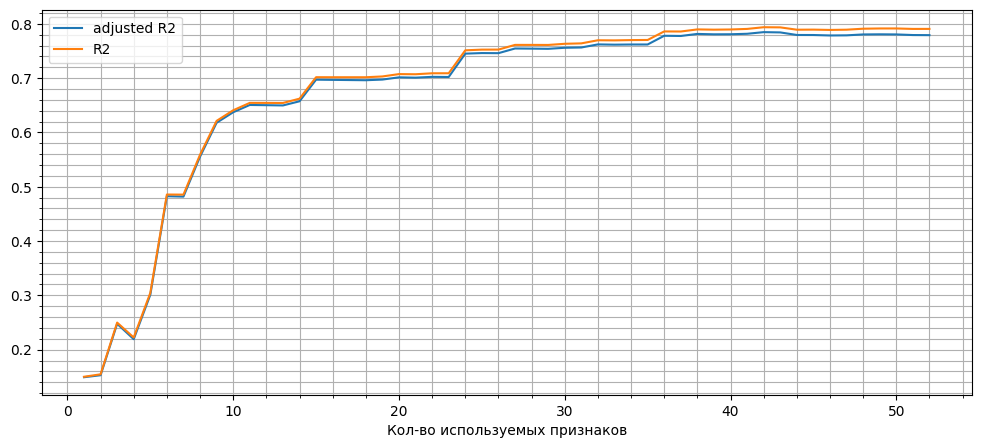

In [478]:
plt.figure(figsize=(12, 5))

plt.plot([_ for _ in range(1, len(sorted_feature_list)+1)], adj_r2_list, label='adjusted R2')
plt.plot([_ for _ in range(1, len(sorted_feature_list)+1)], r2_list, label='R2')

plt.legend()
plt.minorticks_on()
plt.grid(which='both')

plt.xlabel('Кол-во используемых признаков')

Максимальное значение adj_R2 достигается на ~42 используемых признаках - далее будем использовать данную модель

In [481]:
lr_42=LinearRegression()
lr_42.fit(X_train_fe_full[sorted_feature_list[:42]], y_train)
y_pred_42=lr_42.predict(X_test_fe_full[sorted_feature_list[:42]])

r2_42=r2_score(y_test, y_pred_42)
adj_r2_42=adj_r2_score(X_test_fe_full[sorted_feature_list[:42]], r2_42)

adj_r2_42

0.7846778775041783

In [552]:
import pickle

# Сохраняем модель в pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lr_42, f)

# Сохраняем скейлер в pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler4, f)

# Сохраняем ohe в pickle
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

### 3.4. Протестируем разные стратегии заполнения пропусков: для этого придется написать функции, которые готовят датафреймы (производят преобразования как в пунктах выше)

In [728]:
from typing import List, Literal

In [729]:
def prepare_df_no_mis(X_train_: pd.DataFrame, X_test_: pd.DataFrame, strategy: Literal['mean', 'median', 'most_frequent']):
    cat_features_mask=(X_train_.dtypes=='object').values
    
    X_train_real=X_train_[X_train_.columns[~cat_features_mask]]
    X_test_real=X_test_[X_test_.columns[~cat_features_mask]]
    
    mis_repl=impute.SimpleImputer(strategy=strategy)
    
    X_train_real_no_mis=pd.DataFrame(data=mis_repl.fit_transform(X_train_real), columns=X_train_real.columns)
    X_test_real_no_mis=pd.DataFrame(data=mis_repl.transform(X_test_real), columns=X_test_real.columns)
    
    X_train_no_mis=pd.concat([X_train_real_no_mis, X_train_[X_train_.columns[cat_features_mask]]], axis=1)
    X_test_no_mis=pd.concat([X_test_real_no_mis, X_test_[X_test_.columns[cat_features_mask]]], axis=1)
    
    
    X_train_no_mis[['engine', 'seats']]=X_train_no_mis[['engine', 'seats']].astype('int16')
    X_test_no_mis[['engine', 'seats']]=X_test_no_mis[['engine', 'seats']].astype('int16')

    return X_train_no_mis, X_test_no_mis #каждая функция, где есть transform должна возвращать и train и test

In [537]:
def gen_new_features(X: pd.DataFrame):
    X['hp_per_1l_engine']=X.max_power/X.engine
    X['age']=date.today().year-X.year 
    X['age_squared']=X['age']**2
    X['km_driven_per_year']=(X.km_driven/X['age']).astype('int32')
    X['brand']=X.name.apply(lambda x: x.split()[0])
    X['1_or_2_ownrs_Dealer']=np.where(
        X.owner.isin(['First Owner', 'Second Owner'])&(X.seller_type=='Dealer'), 1, 0)
    
    return X

In [538]:
def scale_encode(X_train_: pd.DataFrame, X_test_: pd.DataFrame,):
    cat_features_mask_=(X_train_.dtypes=='object').values
    scaler_=StandardScaler()
    
    X_train_real=X_train_[X_train_.columns[~cat_features_mask_]].drop('1_or_2_ownrs_Dealer', axis=1)
    X_test_real=X_test_[X_test_.columns[~cat_features_mask_]].drop('1_or_2_ownrs_Dealer', axis=1)

    
    X_train_real_scaled=pd.DataFrame(scaler_.fit_transform(X_train_real), columns=X_train_real.columns)
    X_test_real_scaled=pd.DataFrame(scaler_.transform(X_test_real), columns=X_test_real.columns)
    
    X_train_cat=X_train_[X_train_.columns[cat_features_mask_]].drop('name', axis=1)
    X_test_cat=X_test_[X_test_.columns[cat_features_mask_]].drop('name', axis=1)
    
    ohe_=OneHotEncoder(drop='first', handle_unknown='ignore')
    
    X_train_cat_enc=pd.DataFrame(ohe_.fit_transform(X_train_cat).toarray(),
             columns=ohe_.get_feature_names_out())
    X_test_cat_enc=pd.DataFrame(ohe_.transform(X_test_cat).toarray(),
             columns=ohe_.get_feature_names_out())

    
    X_train_full=pd.concat([X_train_real_scaled, X_train_cat_enc, X_train_['1_or_2_ownrs_Dealer']], axis=1)
    X_test_full=pd.concat([X_test_real_scaled, X_test_cat_enc, X_test_['1_or_2_ownrs_Dealer']], axis=1)
    
    return X_train_full, X_test_full


def repl_outliers(X: pd.DataFrame):
    for col in num_features:
        X[col]=np.where(X[col]>X[col].quantile(0.99),
                                  X[col].quantile(0.99),
                                  X[col])
    for col in num_features:
        X[col]=np.where(X[col]<X[col].quantile(0.01),
                                  X[col].quantile(0.01),
                                  X[col])
    return X

In [539]:
X_train_s=df_train.drop('selling_price', axis=1)
X_test_s=df_test.drop('selling_price', axis=1)


adj_r2_s_list=[]

for s in ['mean', 'median', 'most_frequent']:
    X_train_s_no_mis, X_test_s_no_mis = prepare_df_no_mis(X_train_s, X_test_s, s)
    
    X_train_s_no_mis_fe = gen_new_features(X_train_s_no_mis)
    X_test_s_no_mis_fe = gen_new_features(X_test_s_no_mis)

    X_train_s_no_mis_fe_sc_enc, X_test_s_no_mis_fe_sc_enc = scale_encode(X_train_s_no_mis_fe, X_test_s_no_mis_fe)
    

    X_train_s_no_mis_fe_sc_enc = repl_outliers(X_train_s_no_mis_fe_sc_enc)

    lr_s=LinearRegression()
    lr_s.fit(X_train_s_no_mis_fe_sc_enc[sorted_feature_list[:42]], y_train)
    y_pred_s=lr_s.predict(X_test_s_no_mis_fe_sc_enc[sorted_feature_list[:42]])
    r2_s=r2_score(y_test, y_pred_s)
    adj_r2_s=adj_r2_score(X_test_s_no_mis_fe_sc_enc[sorted_feature_list[:42]], r2_s)

    adj_r2_s_list.append(adj_r2_s)

/Users/vladimirmirosnikov/miniconda3/envs/mlops_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vladimirmirosnikov/miniconda3/envs/mlops_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vladimirmirosnikov/miniconda3/envs/mlops_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [541]:
dict(zip(['mean', 'median', 'most_frequent'], adj_r2_s_list))

{'mean': 0.7787836070388359,
 'median': 0.779391313015929,
 'most_frequent': 0.7789944833664403}

видим, что все 3 стратегии дают практически одинаковые результаты, небольшое преимущество в adj_R2 имеет стратегия заполнения пропусков медианой

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [546]:
def business_metrics(y_true, y_pred):
    return np.where(np.abs((y_true-y_pred)/y_true)<=0.1, 1, 0).sum()/len(y_true)

business_metrics(y_test, y_pred_42)

0.235

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

## 5.1. Подготовим себе json/csv и сделаем заготовки для предикта на нем

In [621]:
df_test_ini = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

In [623]:
df_test_ini.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0


In [765]:
df_test_ini.iloc[:30, :].to_csv('cars_for_predict.csv')

In [626]:
s_test_0=df_test_ini.iloc[0, :].copy()
s_test_0.loc['year']=2017
s_test_0.loc['km_driven']=25000

In [629]:
json_test_0=s_test_0.to_json()

In [633]:
data_1_car = json.loads(json_test_0)

with open('data_1_car.json', 'w') as file:
    json.dump(data_1_car, file, indent=4)

In [719]:
 with open('model.pkl', 'rb') as file: 
     model_p = pickle.load(file)
 with open('scaler.pkl', 'rb') as file: 
     scaler_p = pickle.load(file)
 with open('ohe.pkl', 'rb') as file: 
     ohe_p = pickle.load(file) 

In [819]:
def scale_encode2(X: pd.DataFrame, scaler_: StandardScaler, ohe_: OneHotEncoder):
    cat_features_mask_=(X.dtypes=='object').values
    
    X_real=X[X.columns[~cat_features_mask_]].drop('1_or_2_ownrs_Dealer', axis=1)
    
    X_real_scaled=pd.DataFrame(scaler_.transform(X_real), columns=X_real.columns)
    
    X_cat=X[X.columns[cat_features_mask_]].drop('name', axis=1)
    
    X_cat_enc=pd.DataFrame(ohe_.transform(X_cat).toarray(),
             columns=ohe_.get_feature_names_out())

    
    X_full=pd.concat([X_real_scaled, X_cat_enc, X['1_or_2_ownrs_Dealer']], axis=1)
    
    return X_full

## 5.2. Исходный шаблон

In [735]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link